# Examples of the usage

Import dataset class

In [2]:
from urbanworm import UrbanDataSet

## 1 single-image inference

### 1.1 one image input

Initialize dataset object

In [3]:
data = UrbanDataSet(image = './data/test1.jpg')

To let the model understand the task, we need to specify what information we want to know from the input image and the format it should follow to structure the response. In some cases, giving more contexts such as the definition of terminology/concept and criteria for decision making may enhance the inference ability of model.

In [4]:
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words)
'''
prompt = '''
    Is there any damage on the roof?
'''
res = data.oneImgChat(system=system, prompt=prompt)

Inference starts ...


The default format of schema for the output includes:
- question
- answer
- explanation

When saveImg=True, image will be save in the base64 format.

In [5]:
res.keys()

dict_keys(['question', 'answer', 'explanation', 'img'])

In [6]:
res['question'], res['answer'], res['explanation']

('Is there any damage on the roof?',
 'No',
 'Based on the image, the roof appears to be intact and without any visible signs of damage like missing shingles or significant discoloration. It looks generally well-maintained.')

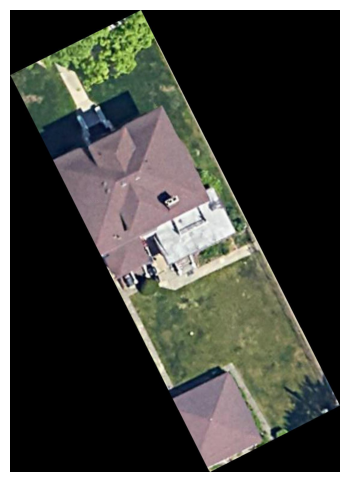

In [7]:
data.plotBase64(res['img'])

### 1.2 customize the format for output

For different research purposes, you can customize the format of responses from the model

In [8]:
from urbanworm.format_creation import create_format

The response format can be customized. In the example below, "explanation" is replaced by "confidence", which measures how the model is confident with its answer.

In [9]:
# specify the new schema in a dictionary
schema = {
    "question": (str, ...),
    "answer": (str, ...),
    "confidence": (float, ...), 
}
# define a new Response class
CustomResponse = create_format(schema)

In [10]:
data = UrbanDataSet(image = './data/test2.jpg', format=CustomResponse)
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), confidence (0-1)
'''
prompt = '''
    Is there any damage on the roof?
'''
res = data.oneImgChat(system=system, prompt=prompt)
res.keys()

Inference starts ...


dict_keys(['question', 'answer', 'confidence', 'img'])

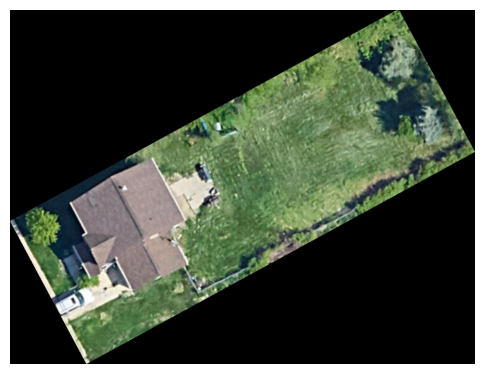

In [11]:
data.plotBase64(res['img'])

In [12]:
res['question'], res['answer'], res['confidence']

('Is there any damage on the roof?', 'no', 0.8)

## 2 batch images inference

### 2.1 batch images input

In [13]:
imgs = ['./data/test1.jpg', './data/test2.jpg', './data/test3.jpg',]
data = UrbanDataSet(images = imgs)
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words)
'''
prompt = '''
    Is there any damage on the roof?
    Is there solar panel on the roof?
'''
res = data.loopImgChat(system=system, prompt=prompt, output_df=True)
res

Processing...: 100%|█████████████████████████| 3/3 [00:06<00:00,  2.23s/it]


,question1,answer1,explanation1,img
0,Is there any damage on the roof?,No,"Based on the image, the roof appears intact wi...",./data/test1.jpg
1,Is there any damage on the roof?,No,"Based on the image, the roof appears intact wi...",./data/test1.jpg
2,Is there any damage on the roof?,No,The roof appears intact and uniform in color a...,./data/test2.jpg
3,Is there any damage on the roof?,No,The roof appears intact and uniform in color a...,./data/test2.jpg
4,Is there any damage on the roof?,No,The roof appears relatively uniform in color a...,./data/test3.jpg
5,Is there any damage on the roof?,No,The roof appears relatively uniform in color a...,./data/test3.jpg


### 2.2 Open-source building footprints

In [14]:
bbox = (-83.235572,42.348092,-83.235154,42.348806)
data = UrbanDataSet()
data.bbox2Buildings(bbox, source='osm')

'5 buildings found in the bounding box.'

In [15]:
data.units

,geometry
0,"POLYGON ((-83.23534 42.3488, -83.23523 42.3488..."
1,"POLYGON ((-83.23533 42.34865, -83.23522 42.348..."
2,"POLYGON ((-83.23533 42.3485, -83.23522 42.3485..."
3,"POLYGON ((-83.23533 42.34835, -83.23521 42.348..."
4,"POLYGON ((-83.23532 42.34821, -83.23521 42.348..."


<Axes: >

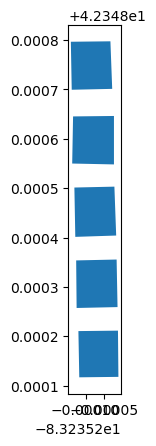

In [16]:
data.units.plot()

The output can be assigned to a new variable. It is also automatically stored in the data structure and can be called.

In [17]:
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words)
'''
prompt = {
    'top':'''
        Is there any damage on the roof?
    '''
}

# inspect the aerial images only (with type='top')
res = data.loopUnitChat(system=system, prompt=prompt, type='top', epsg=2253)

Processing...: 100%|█████████████████████████| 5/5 [00:08<00:00,  1.64s/it]


In [18]:
data.to_gdf()

,geometry,top_view_question1,top_view_answer1,top_view_explanation1,top_view_base64
0,POINT (-83.23528 42.34875),Is there any damage on the roof?,No,"Based on the top-down view, the roof appears i...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,POINT (-83.23528 42.3486),Is there any damage on the roof?,No,"Based on the image, the roof appears to be int...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,POINT (-83.23527 42.34845),Is there any damage on the roof?,No,"Based on the image, the roof appears intact an...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,POINT (-83.23527 42.34831),Is there any damage on the roof?,No,The roof appears to be flat and uniform. There...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,POINT (-83.23526 42.34816),Is there any damage on the roof?,No,The roof appears intact and smooth from this t...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


With `type = 'both'` (The default is `top`.), the method `loopUnitChat` can inspect both aerial and street view images. 
With `multi = True` (The default is `False`), for each unit, three closest street views will be collected for inference. This will take longer time to process the data.

In this case, the instruction and prompt will be little bit different and more detailed for specifying questions for each type of image.

In [19]:
system = '''
    Given a top view image or street view images, you are going to roughly estimate house conditions. 
    Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words) for each question.
'''

prompt = {
    'top': '''
        Is there any damage on the roof?
    ''',
    'street': '''
        Is the house occupied?
        Is any window broken or boarded?
        Is the door missing or boarded?
        Is the wall missing or damaged?
        Is the yard maintained well?
    '''
}

# add the Mapillary key
data.mapillary_key = 'MLY|...'
# inspect both the aerial and street view images (with type='both')
res = data.loopUnitChat(system=system, prompt=prompt, type='both', epsg=2253, multi=True)

Processing...:  60%|███████████████          | 3/5 [00:53<00:37, 18.69s/it]

Error in getSV: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>


Processing...: 100%|█████████████████████████| 5/5 [01:33<00:00, 18.79s/it]

Error in getSV: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>


In [20]:
data.to_gdf()

,geometry,top_view_question1,top_view_answer1,top_view_explanation1,street_view_question1,street_view_answer1,street_view_explanation1,street_view_question2,street_view_answer2,street_view_explanation2,...,street_view_answer3,street_view_explanation3,street_view_question4,street_view_answer4,street_view_explanation4,street_view_question5,street_view_answer5,street_view_explanation5,top_view_base64,street_view_base64
0,POINT (-83.23528 42.34875),Is there any damage on the roof?,No,The roof appears intact and smooth from this a...,Is the house occupied? | Is the house occupied...,no | no | no,"There are no signs of activity, like cars in t...",Is any window broken or boarded? | Is any wind...,no | no | no,All windows appear intact and are not boarded ...,...,no | no | no,The front doors are present and appear to be i...,Is the wall missing or damaged? | Is the wall ...,no | no | no,The walls of the houses appear to be intact an...,Is the yard maintained well? | Is the yard mai...,no | no | no,The yards appear somewhat overgrown with falle...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,[iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...
1,POINT (-83.23528 42.3486),Is there any damage on the roof?,No,The roof appears to be intact and without any ...,Is the house occupied? | Is the house occupied...,no | no | no,"There are no signs of activity, like cars in t...",Is any window broken or boarded? | Is any wind...,no | no | no,All windows appear intact and clear. There are...,...,no | no | no,The front door is present and appears to be in...,Is the wall missing or damaged? | Is the wall ...,no | no | no,The visible walls of the house appear to be in...,Is the yard maintained well? | Is the yard mai...,no | no | yes,The yard appears somewhat overgrown with falle...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,[iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...
2,POINT (-83.23527 42.34831),Is there any damage on the roof?,No,The roof appears to be flat and intact. There ...,Is the house occupied? | Is the house occupied...,no | no | no,"There is a car parked in front of the house, b...",Is any window broken or boarded? | Is any wind...,no | no | no,All windows appear intact and are not visibly ...,...,no | no | no,The front door is present and appears to be in...,Is the wall missing or damaged? | Is the wall ...,no | no | no,The visible walls of the house appear to be in...,Is the yard maintained well? | Is the yard mai...,no | no | no,"The yard is overgrown with weeds and grass, in...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,[iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...


# 3 Chat for data analysis/interpretation

In [21]:
data.dataAnalyst(prompt='please summarize the results')

Okay, let's analyze the provided data and synthesize a comprehensive understanding of the responses.

**Overall Observations:**

*   **Dominant Response:** The overwhelmingly dominant response across all questions is “no”. This is particularly true for questions related to damage (roof, windows, doors, walls) and occupancy.
*   **Consistent Question Structure:** The questions are consistently framed with a repeated phrasing ("Is there any...?", "Is the house occupied?"). This suggests a standardized data collection process.
*   **Multiple Question Sets:** The data includes multiple sets of questions, likely representing different observations or assessments of the same property.

**Detailed Analysis of Response Types & Distributions:**

*   **`top_view_answer1` (Roof Damage):**  String. Value distribution: “no” (3), “yes” (1). This indicates that in the majority of observations, the roof was assessed as undamaged.
*   **`street_view_answer1` (Occupancy):** String. Value distribution: “

In [22]:
data.messageHistory

[{'role': 'system', 'content': 'You are a spatial data analyst.'},
 {'role': 'user',
  'content': 'Please analyze and summarize the main patterns found in the answer columns of this dataset.\n            Consider the value types (e.g., numeric or categorical), and also consider the relationship between question and answer fields when interpreting the values.\n\n            Dataset summary:\n            - Number of spatial units: 3\n- Bounding box: lon [-83.2353, -83.2353], lat [42.3483, 42.3487]\n- Number of data fields (excluding geometry and large fields): 18\n- Field names: top_view_question1, top_view_answer1, top_view_explanation1, street_view_question1, street_view_answer1, street_view_explanation1, street_view_question2, street_view_answer2, street_view_explanation2, street_view_question3, street_view_answer3, street_view_explanation3, street_view_question4, street_view_answer4, street_view_explanation4, street_view_question5, street_view_answer5, street_view_explanation5\n  Sam

3.1 Summarize key characteristics of the GeoDataFrame

In [23]:
summary, example_rows = data._UrbanDataSet__summarize_geo_df()
print(summary)

- Number of spatial units: 3
- Bounding box: lon [-83.2353, -83.2353], lat [42.3483, 42.3487]
- Number of data fields (excluding geometry and large fields): 18
- Field names: top_view_question1, top_view_answer1, top_view_explanation1, street_view_question1, street_view_answer1, street_view_explanation1, street_view_question2, street_view_answer2, street_view_explanation2, street_view_question3, street_view_answer3, street_view_explanation3, street_view_question4, street_view_answer4, street_view_explanation4, street_view_question5, street_view_answer5, street_view_explanation5
  Sample 1: {'top_view_question1': 'Is there any damage on the roof?', 'top_view_answer1': 'No', 'top_view_explanation1': 'The roof appears intact and smooth from this aerial view. There are no visible signs of missing shingles, holes, or other structural damage.', 'street_view_question1': 'Is the house occupied? | Is the house occupied? | Is the house occupied?', 'street_view_answer1': 'no | no | no', 'street_v

3.2 Plot the final GeoDataFrame results (with answer color-coded)

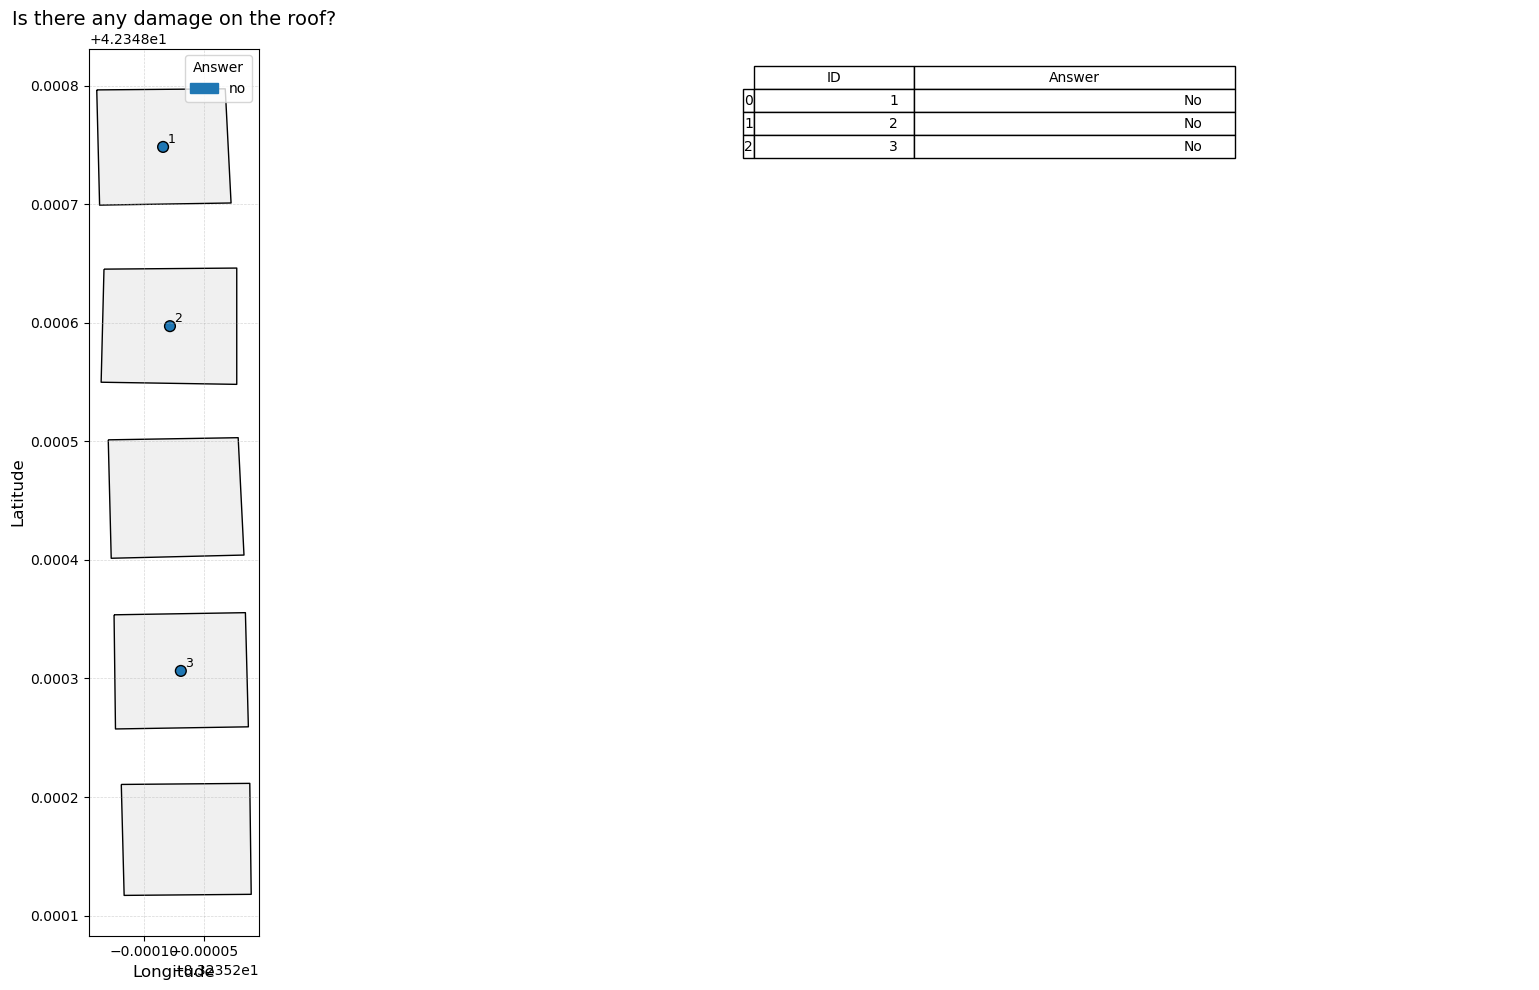

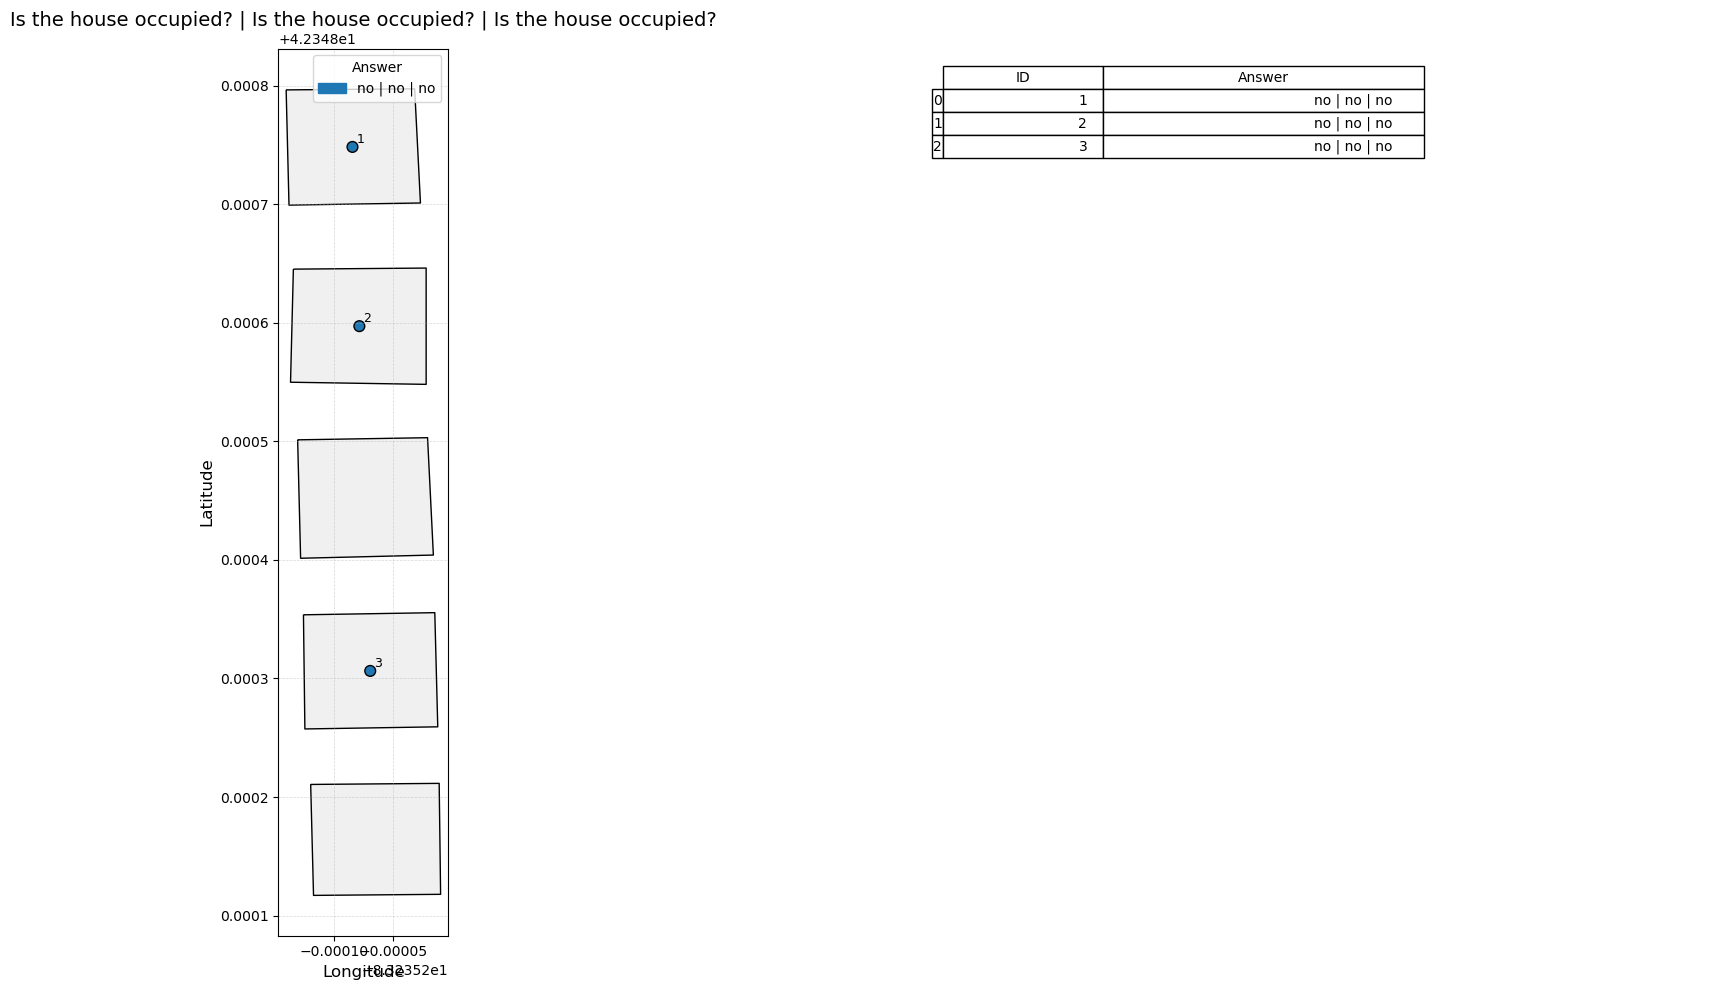

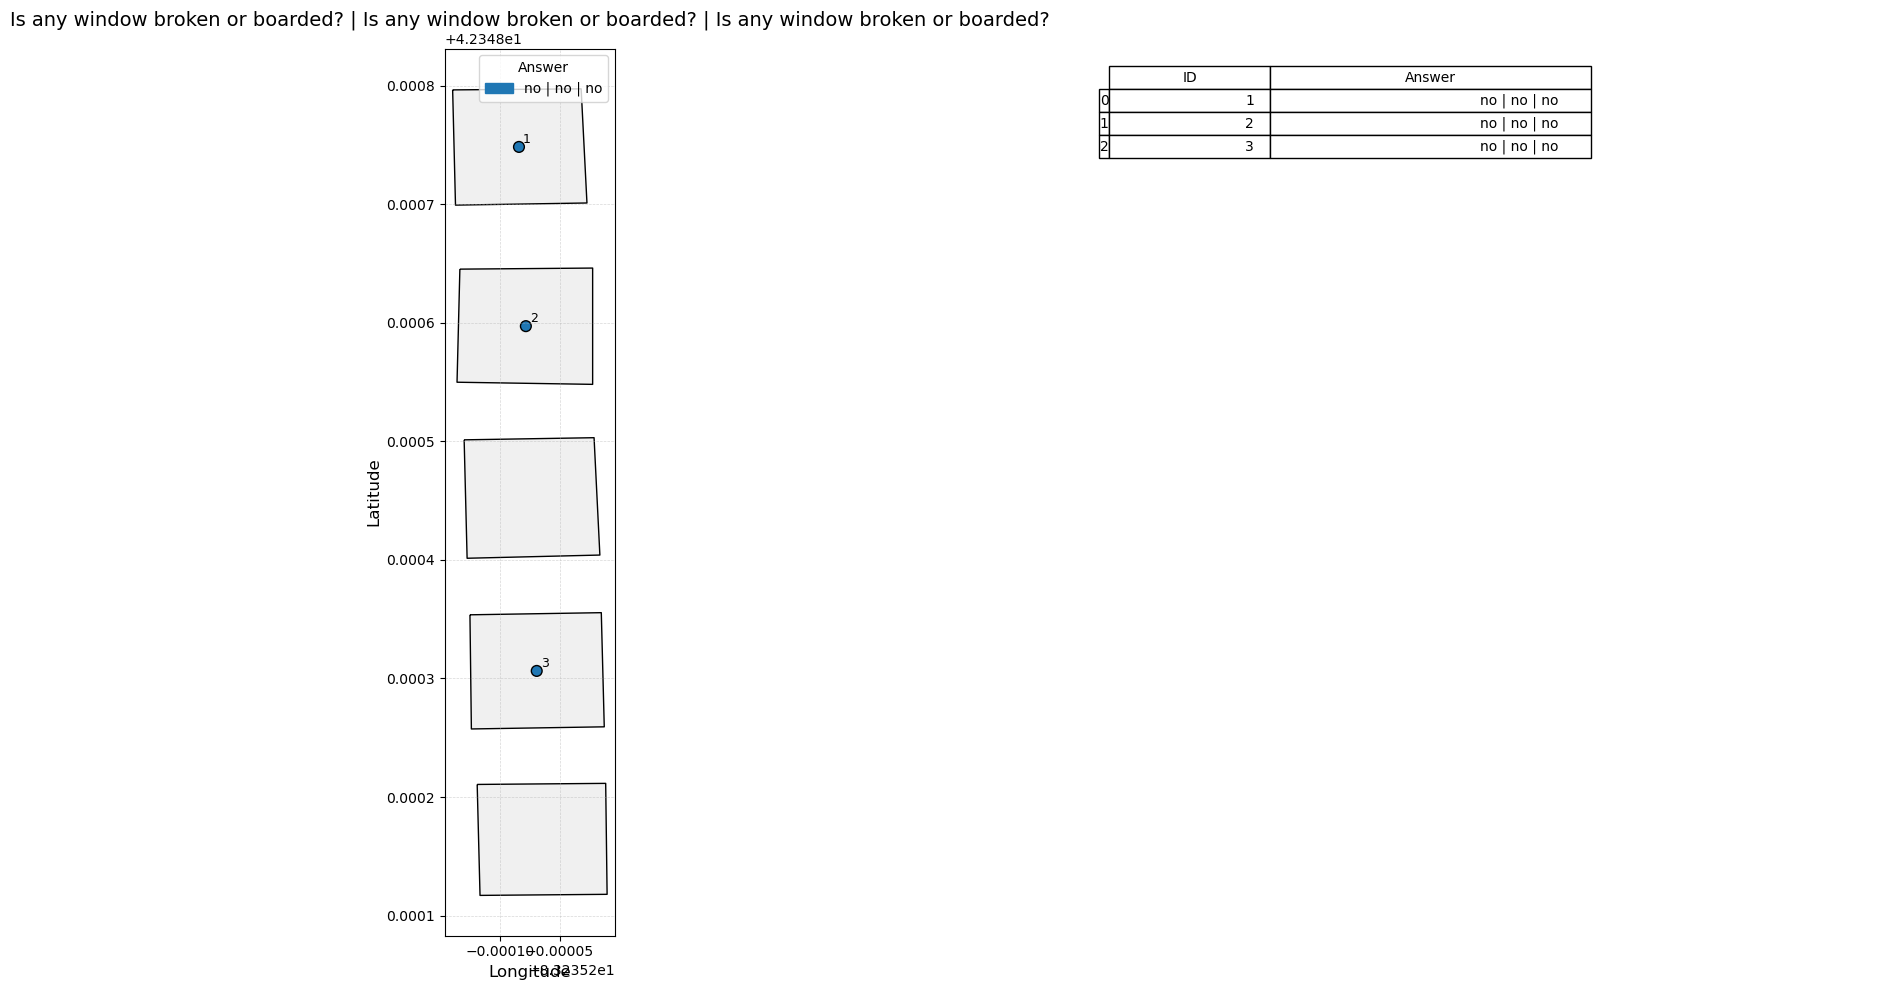

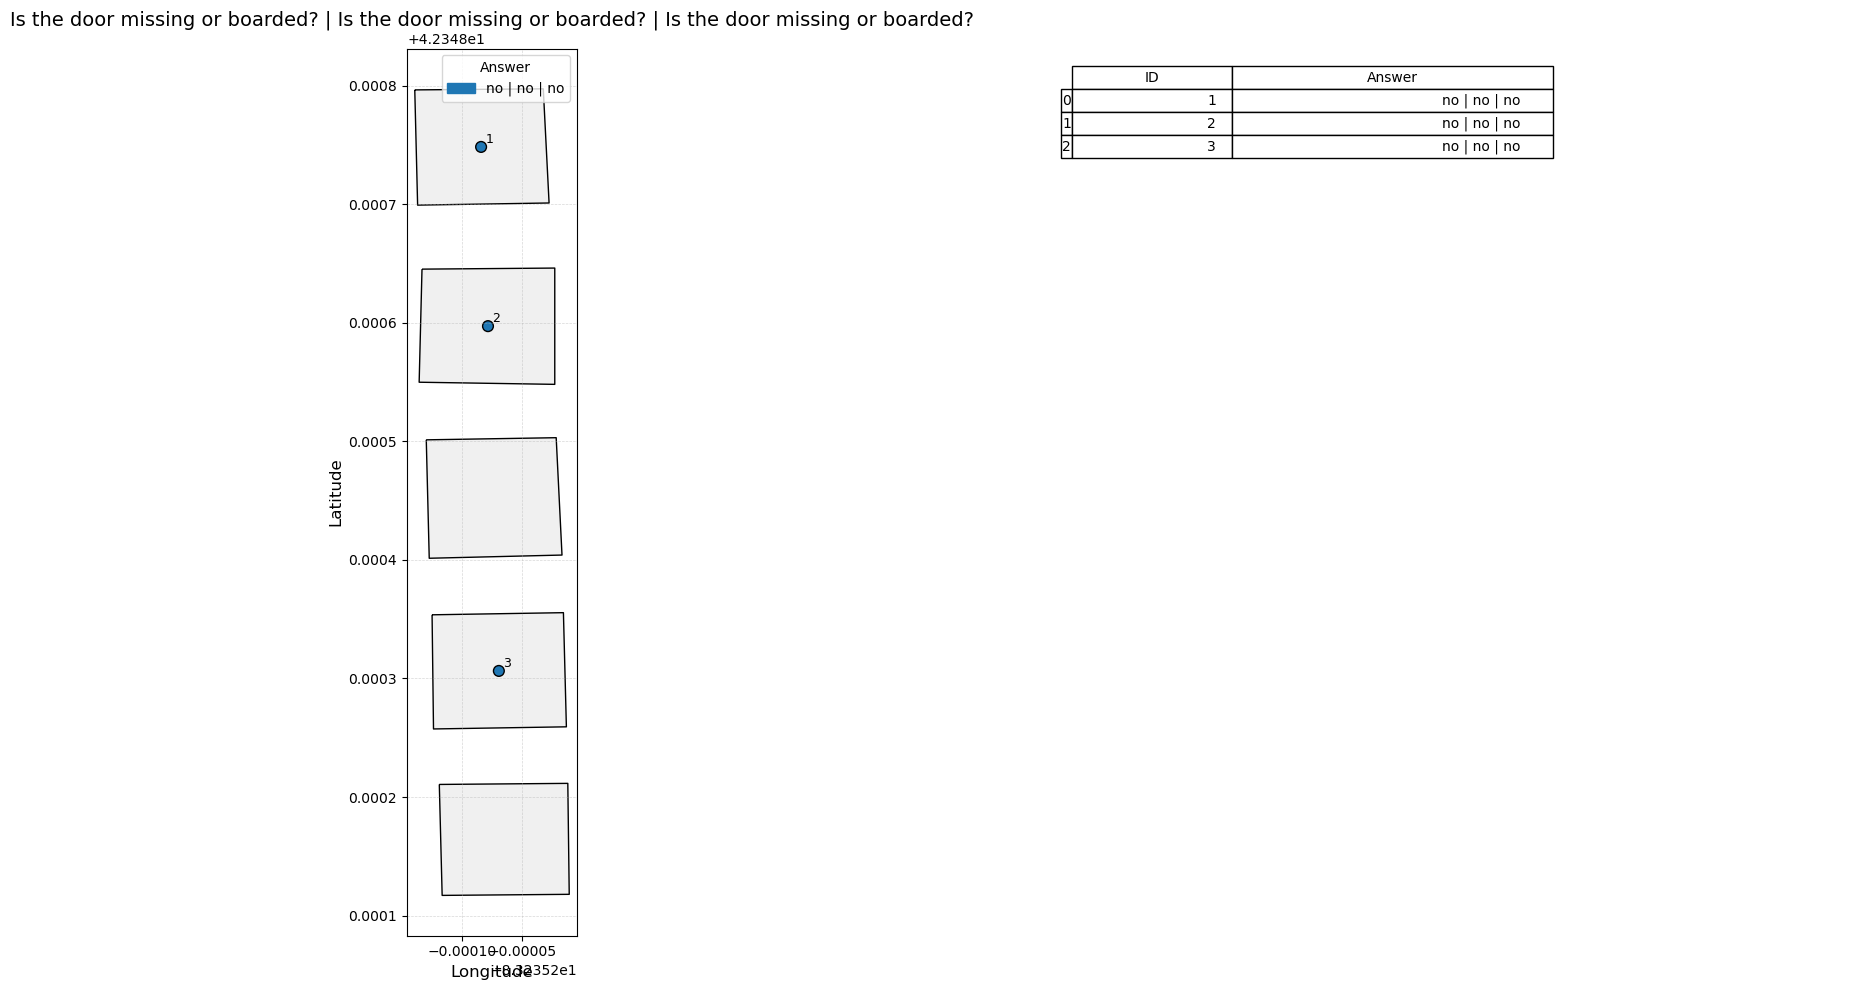

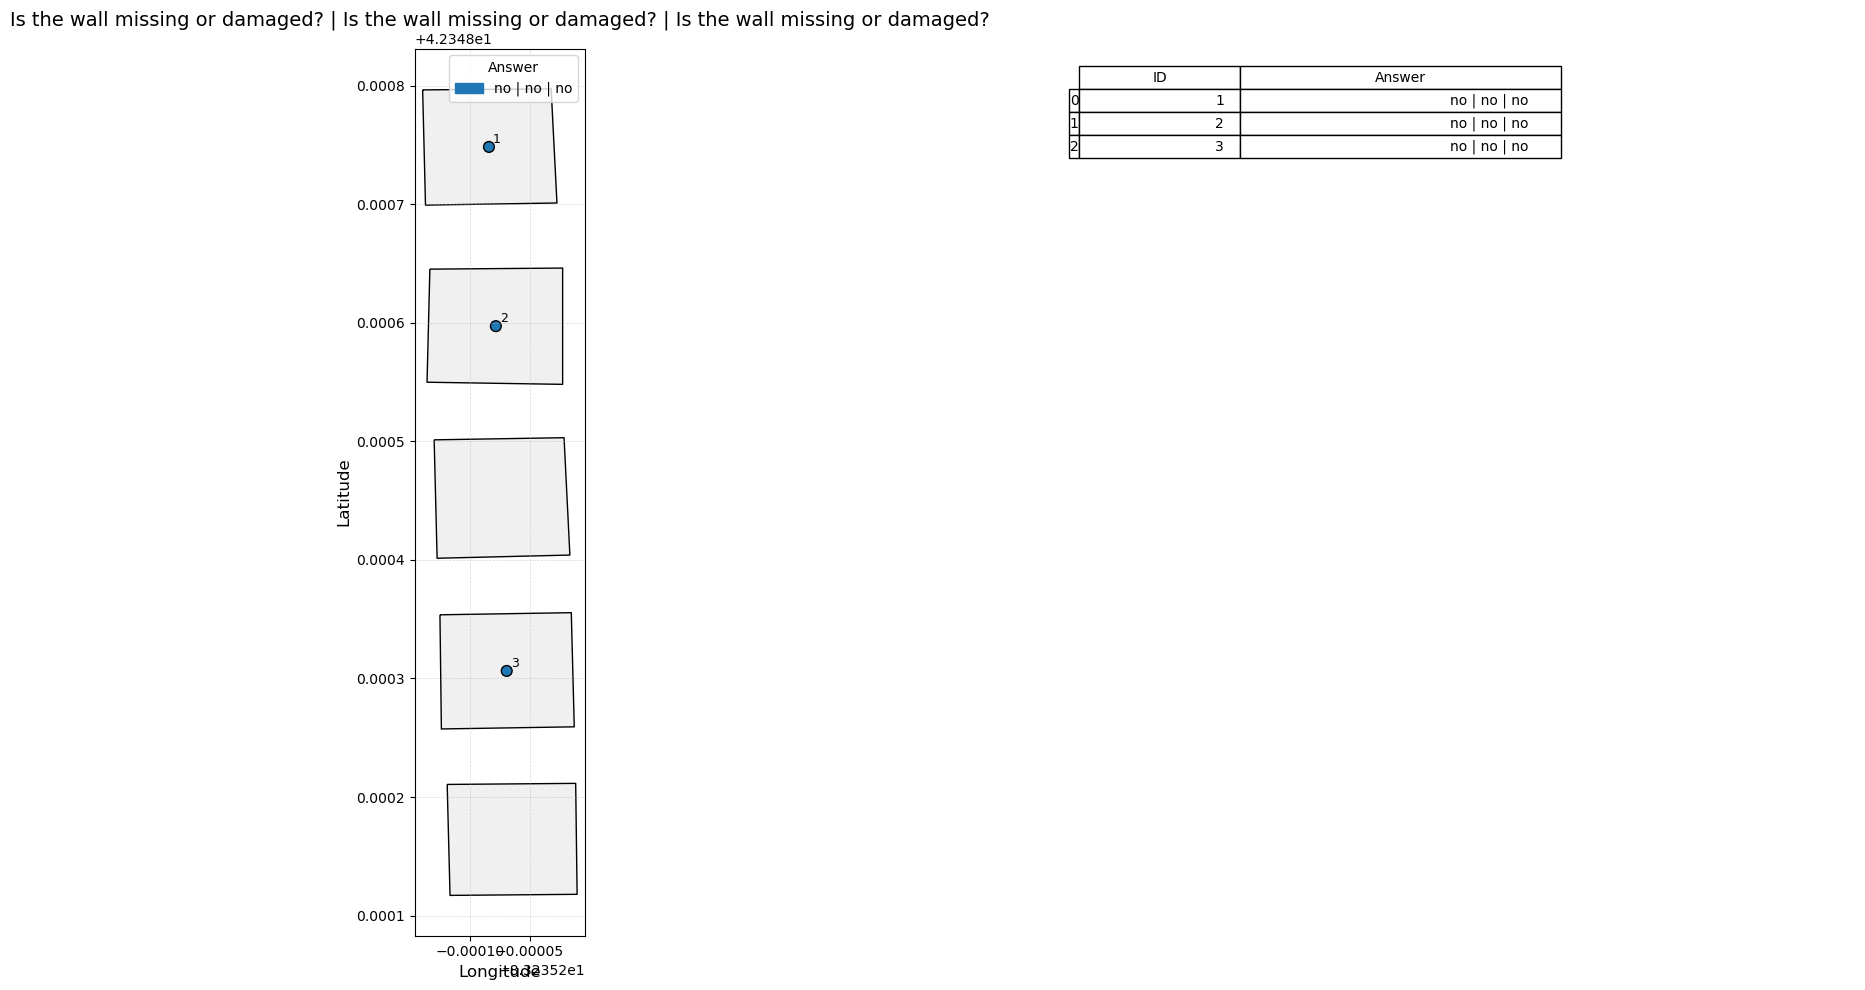

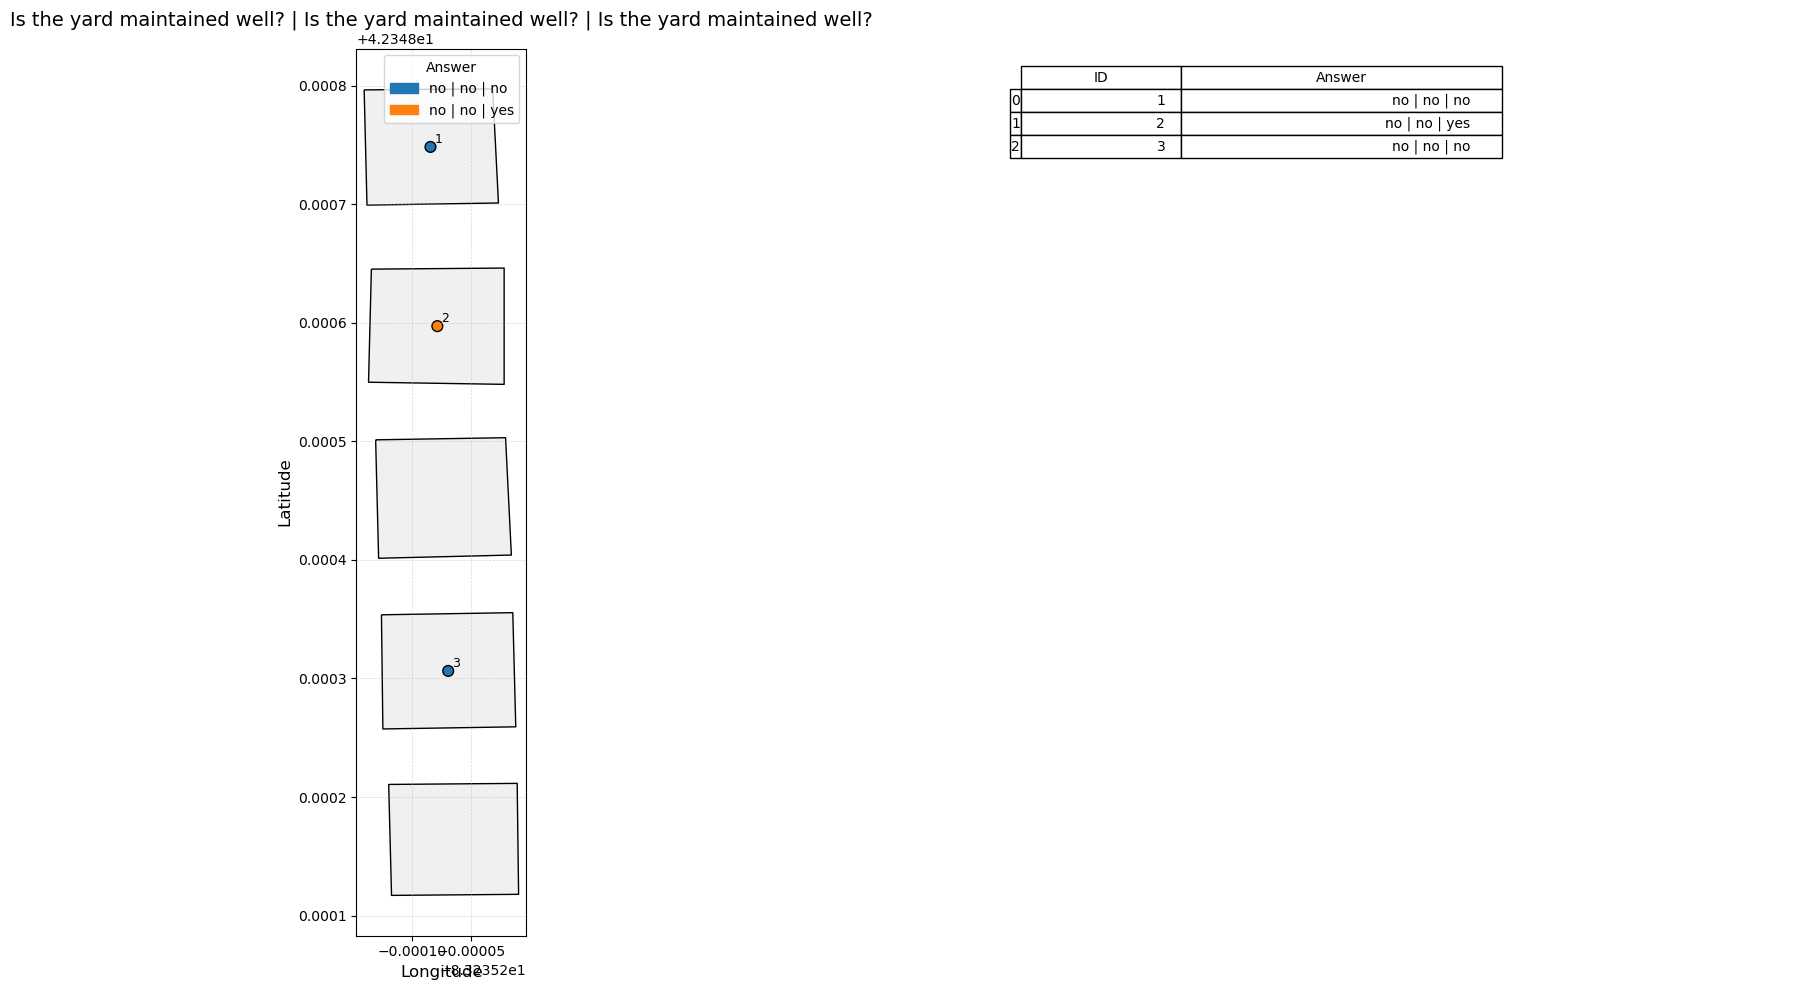

In [25]:
data.plot_gdf()